# importing necessary libraries

In [1]:
import pandas as pd

# Reading the dataset

In [2]:
data = pd.read_csv("C:/Users/Sanga/Downloads/heart_disease_data (1).csv")

# Data Preprocessing

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_dup = data.duplicated().any()
data_dup

True

In [5]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

In [7]:
cate_val = []
cont_val = []
for column in data.columns:
 if data[column].nunique() <= 10:
    cate_val.append(column)
 else:
    cont_val.append(column)
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [9]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# Splitting into training and testing

In [12]:
X = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [14]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [16]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [17]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9016393442622951

# Support vector machine

In [20]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [21]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8688524590163934

# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8688524590163934

# Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8032786885245902

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8524590163934426

# Gradient boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.7704918032786885

In [30]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
 'ACC':[accuracy_score(y_test,y_pred1),
 accuracy_score(y_test,y_pred2),
 accuracy_score(y_test,y_pred3),
 accuracy_score(y_test,y_pred4),
 accuracy_score(y_test,y_pred5),
 accuracy_score(y_test,y_pred6)]})
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.803279
4,RF,0.852459
5,GB,0.770492


# Comparision of different classifiers accuracies

C:\Users\Sanga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

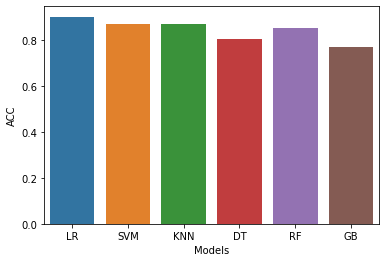

In [31]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])